In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
df = pd.read_csv("football_momentum.csv")

In [12]:
df

,Event_Type,Score_Differential,Time_of_Event,Home_Away,Possession_Pre_Event,Shots_Pre_Event,Passes_Completed_Pre_Event,Opponent_Strength,Fatigue_Index,Crowd_Influence,Key_Player_Involved,Tactical_Shift,Momentum_Swing,Recent_Form,Event_Severity,Sub_Impact,Pressure_Index,Recovery_Probability
0,Yellow_Card_Own,0,30.108187,0,57.152476,1,48,0.789462,0.345692,0.418723,1,1,-10.926363,0.803006,0.858110,0.487918,0.344827,0
1,Crucial_Save,3,29.948676,1,47.474564,6,56,0.667934,0.319040,0.307198,0,0,6.746218,0.590061,0.536937,0.360082,0.322726,1
2,Sub_In,-1,38.609121,1,54.029873,0,55,0.530269,0.663701,0.398889,0,0,5.332825,0.493934,0.555091,0.195169,0.593923,0
3,Yellow_Card_Opp,3,13.143597,0,73.960365,4,70,0.612030,0.486944,0.770759,1,1,1.634350,0.592765,0.639111,0.558295,0.432393,1
4,Goal_Conceded,0,78.360746,0,78.195534,4,60,0.695261,0.566112,0.609991,1,1,-9.586169,0.713282,0.676551,0.357385,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Sub_In,-2,76.319960,1,20.241517,2,69,0.644919,0.428737,0.412418,1,1,-8.920247,0.479566,0.661545,0.295199,0.358147,0
1996,Missed_Chance,2,50.262541,1,44.098711,4,54,0.988235,0.334331,0.210121,1,1,4.325607,0.480120,0.532391,0.060051,0.808284,1
1997,Goal_Scored,-3,30.594485,1,31.208050,6,52,0.608523,0.694919,0.490969,1,0,-4.394298,0.895182,0.717016,0.319327,0.890707,1
1998,Goal_Scored,3,95.000000,0,57.464029,1,48,0.901814,0.629425,0.323880,0,0,10.416725,0.495718,0.314896,0.354481,0.584083,1


In [13]:
# Set plot style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [14]:
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

=== Dataset Overview ===
Shape: (2000, 18)

Columns: ['Event_Type', 'Score_Differential', 'Time_of_Event', 'Home_Away', 'Possession_Pre_Event', 'Shots_Pre_Event', 'Passes_Completed_Pre_Event', 'Opponent_Strength', 'Fatigue_Index', 'Crowd_Influence', 'Key_Player_Involved', 'Tactical_Shift', 'Momentum_Swing', 'Recent_Form', 'Event_Severity', 'Sub_Impact', 'Pressure_Index', 'Recovery_Probability']

Data Types:
 Event_Type                     object
Score_Differential              int64
Time_of_Event                 float64
Home_Away                       int64
Possession_Pre_Event          float64
Shots_Pre_Event                 int64
Passes_Completed_Pre_Event      int64
Opponent_Strength             float64
Fatigue_Index                 float64
Crowd_Influence               float64
Key_Player_Involved             int64
Tactical_Shift                  int64
Momentum_Swing                float64
Recent_Form                   float64
Event_Severity                float64
Sub_Impact        

In [15]:
print("\n=== Summary Statistics ===")
# Numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumerical Features Stats:\n", df[numerical_cols].describe())


=== Summary Statistics ===

Numerical Features Stats:
        Score_Differential  Time_of_Event    Home_Away  Possession_Pre_Event  \
count         2000.000000    2000.000000  2000.000000           2000.000000   
mean            -0.065000      57.575941     0.504500             49.930038   
std              1.989159      25.614982     0.500105             17.524197   
min             -3.000000       0.770526     0.000000             20.033251   
25%             -2.000000      37.256631     0.000000             34.380459   
50%              0.000000      57.820251     1.000000             49.540678   
75%              2.000000      78.653353     1.000000             65.806222   
max              3.000000      95.000000     1.000000             79.988309   

       Shots_Pre_Event  Passes_Completed_Pre_Event  Opponent_Strength  \
count      2000.000000                 2000.000000        2000.000000   
mean          3.112000                   59.878000           0.695455   
std          

In [16]:
# Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts(normalize=True))


Value Counts for Event_Type:
 Event_Type
Goal_Scored        0.1480
Yellow_Card_Opp    0.1420
Sub_Out            0.1375
Sub_In             0.1365
Goal_Conceded      0.1350
Yellow_Card_Own    0.1265
Missed_Chance      0.0475
Red_Card_Opp       0.0465
Crucial_Save       0.0430
Red_Card_Own       0.0375
Name: proportion, dtype: float64



=== Distribution Analysis ===


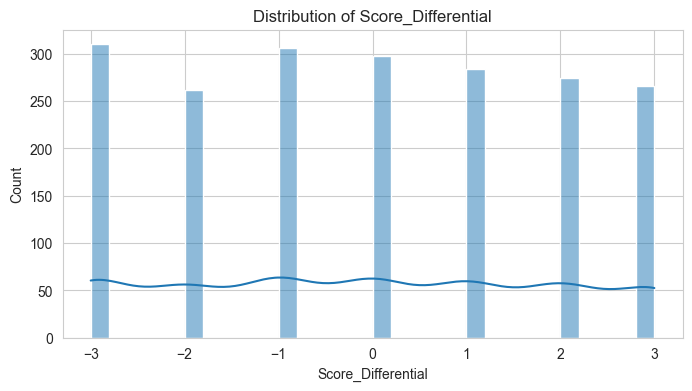

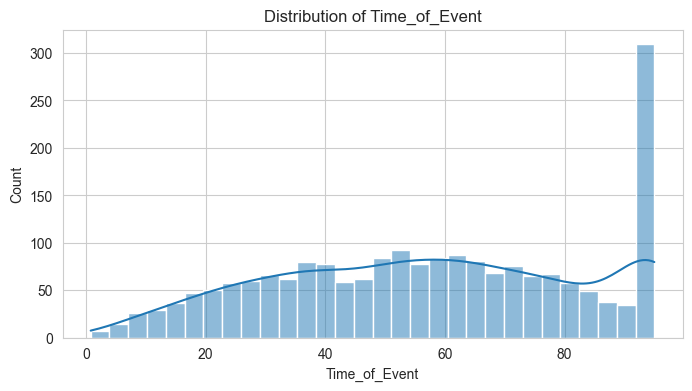

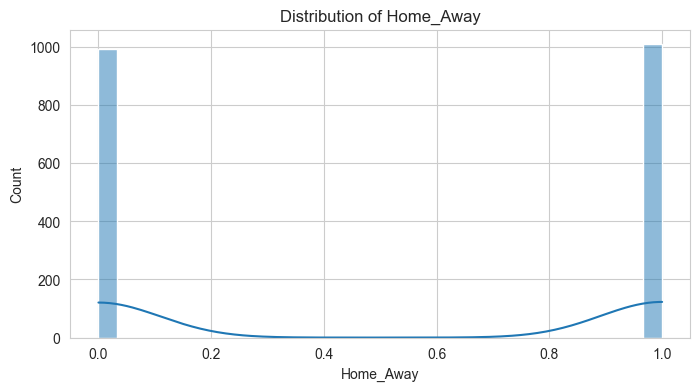

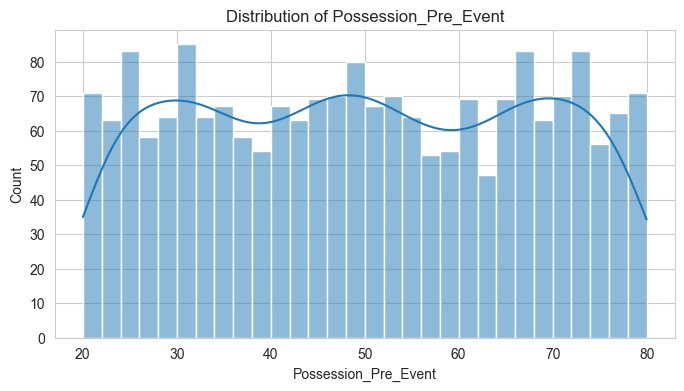

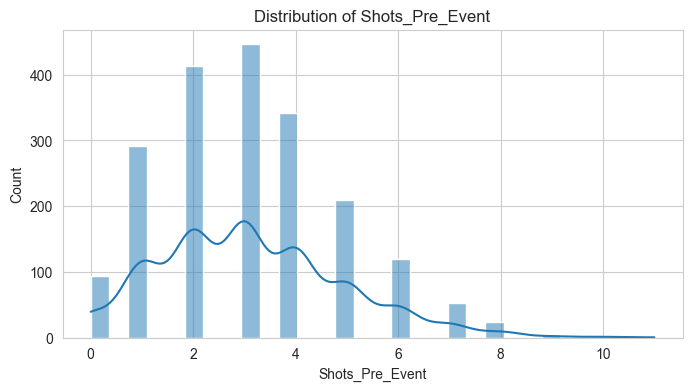

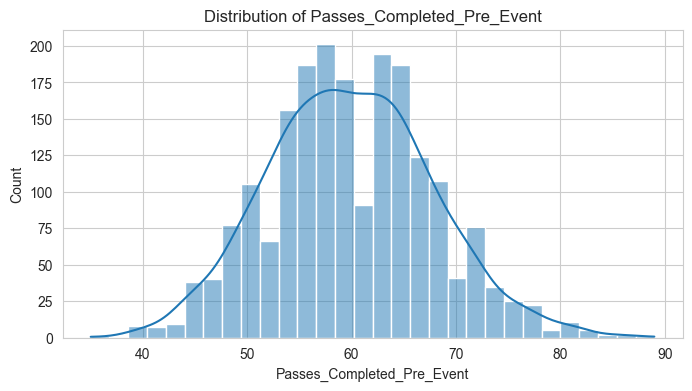

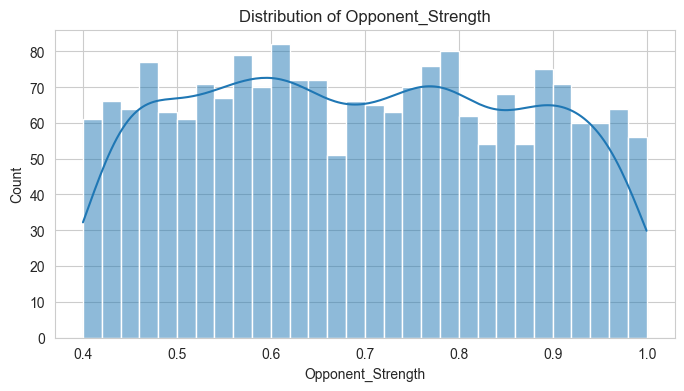

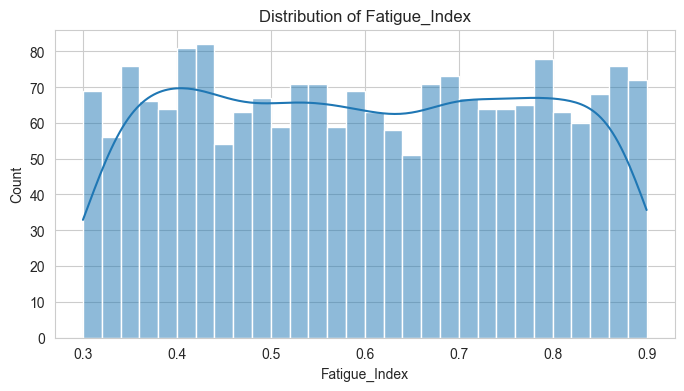

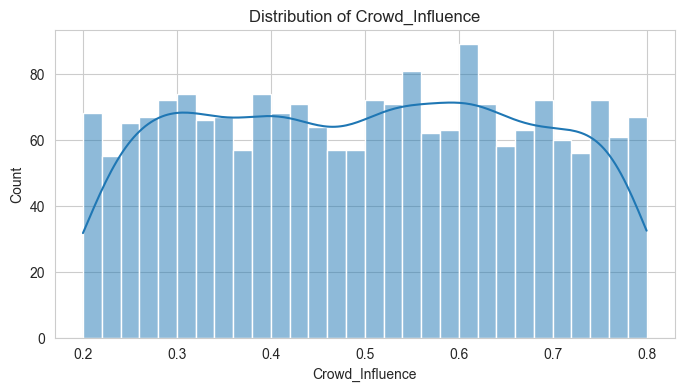

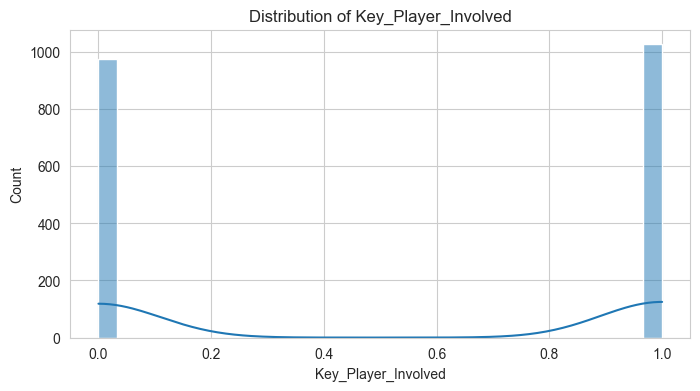

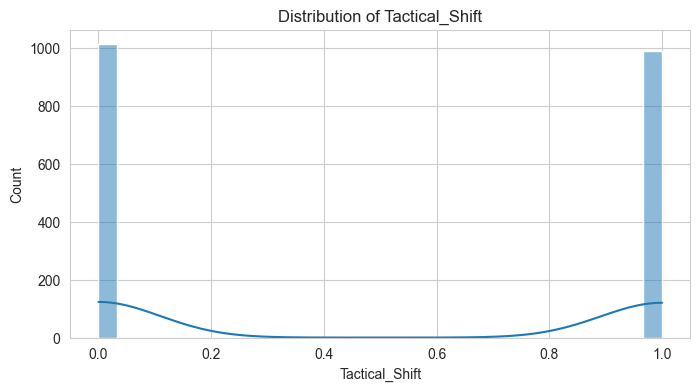

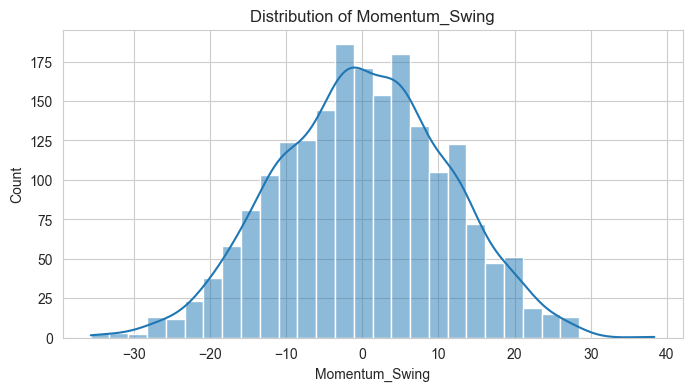

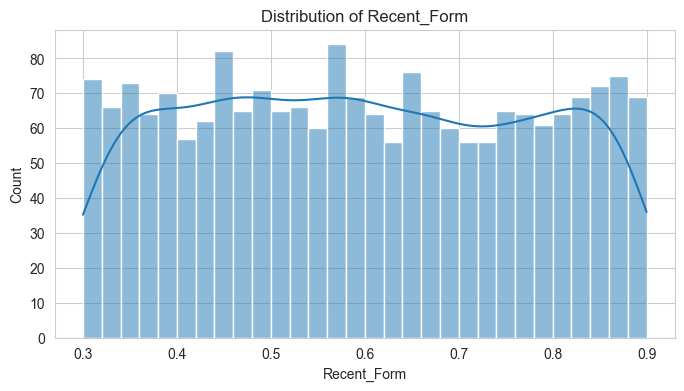

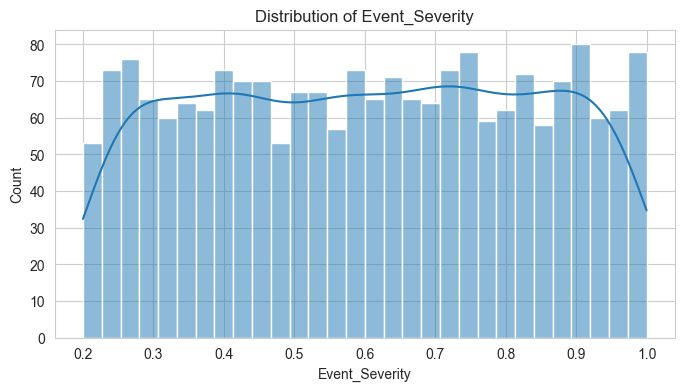

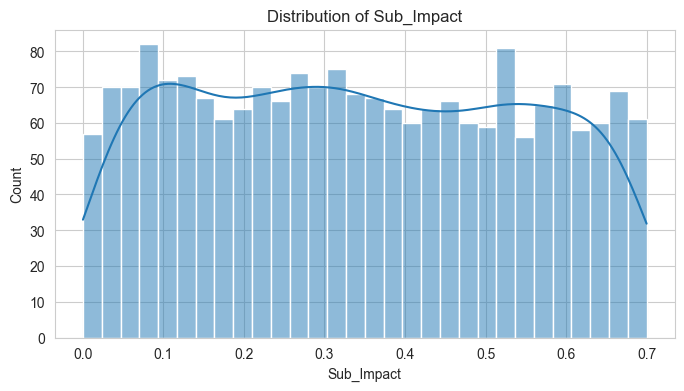

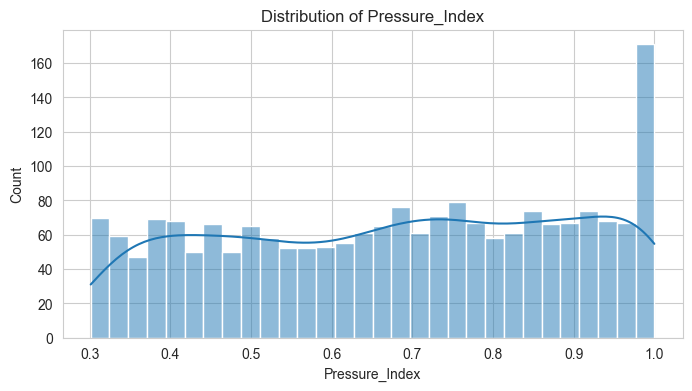

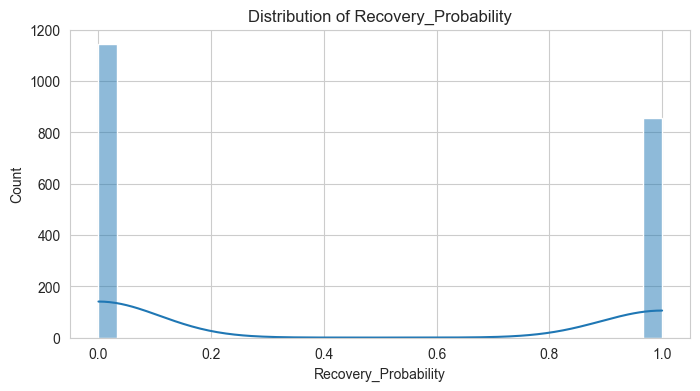

In [18]:
# --- 3. Distribution Analysis ---
print("\n=== Distribution Analysis ===")

# Numerical feature distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    #plt.savefig(f"{col}_distribution.png")  # Save for Streamlit
    plt.show()

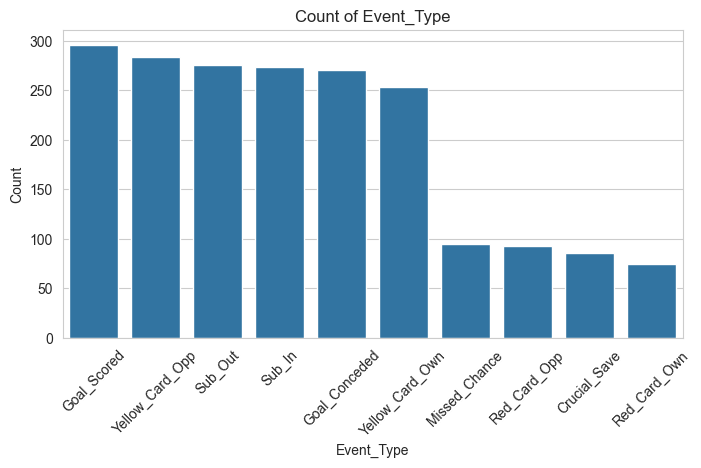

In [19]:
# Categorical feature distribution
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    #plt.savefig(f"{col}_count.png")
    plt.show()


=== Recovery_Probability Analysis ===
Recovery_Probability Distribution:
 Recovery_Probability
0    0.5715
1    0.4285
Name: proportion, dtype: float64


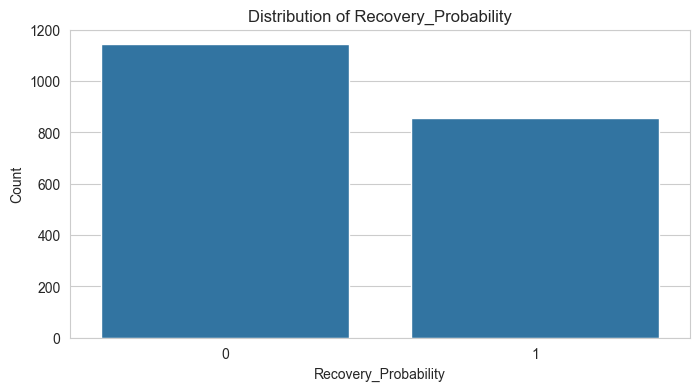

In [20]:
# --- 4. Target Variable Analysis ---
print("\n=== Recovery_Probability Analysis ===")
print("Recovery_Probability Distribution:\n", df['Recovery_Probability'].value_counts(normalize=True))

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Recovery_Probability')
plt.title("Distribution of Recovery_Probability")
plt.ylabel("Count")
#plt.savefig("recovery_probability_distribution.png")
plt.show()

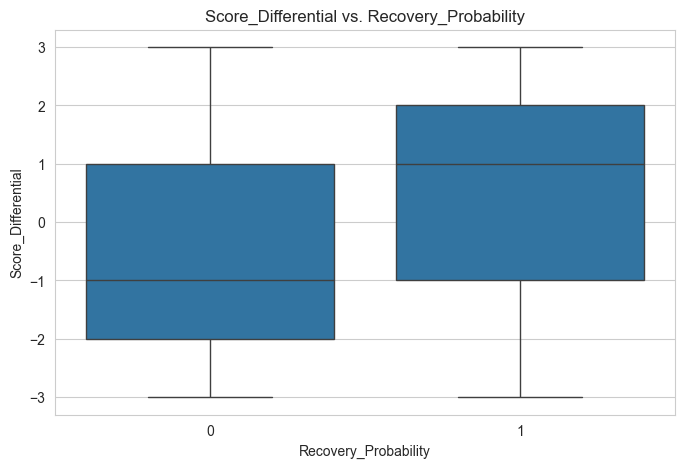

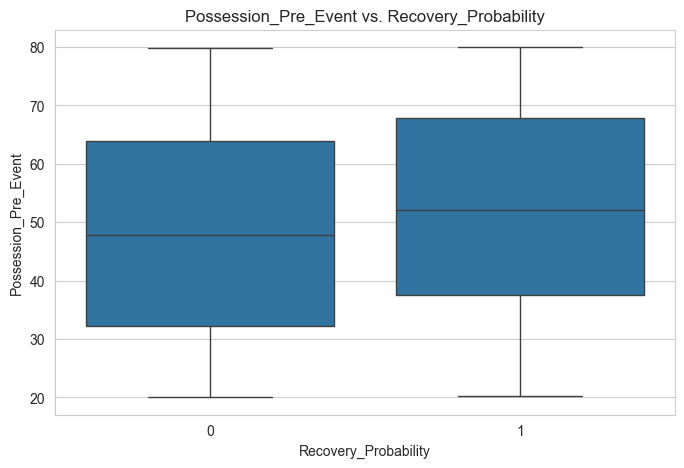

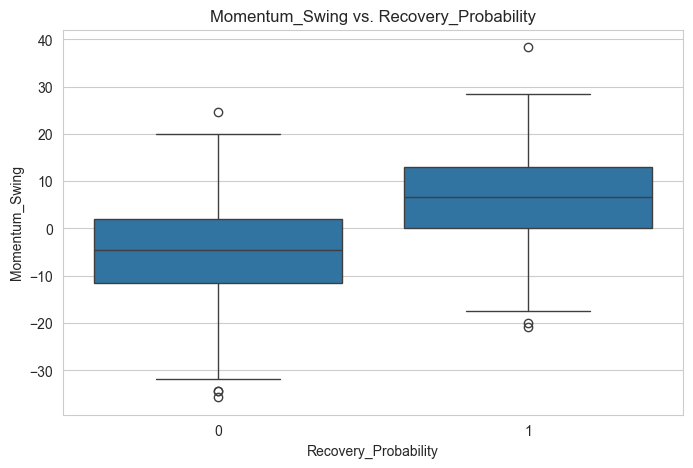

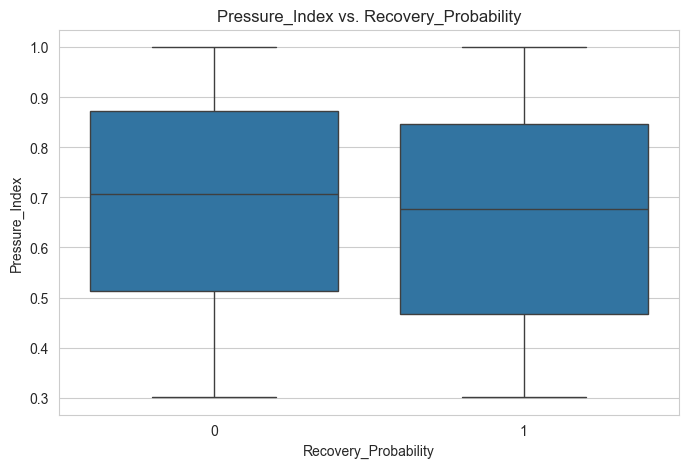

In [22]:
# 3. Numerical Features vs. Recovery_Probability (Boxplots)
numerical_cols = ['Score_Differential', 'Possession_Pre_Event', 'Momentum_Swing', 'Pressure_Index']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Recovery_Probability', y=col)
    plt.title(f"{col} vs. Recovery_Probability")
    plt.xlabel("Recovery_Probability")
    plt.ylabel(col)
    #plt.savefig(f"outputs/{col}_vs_recovery.png")
    plt.show()

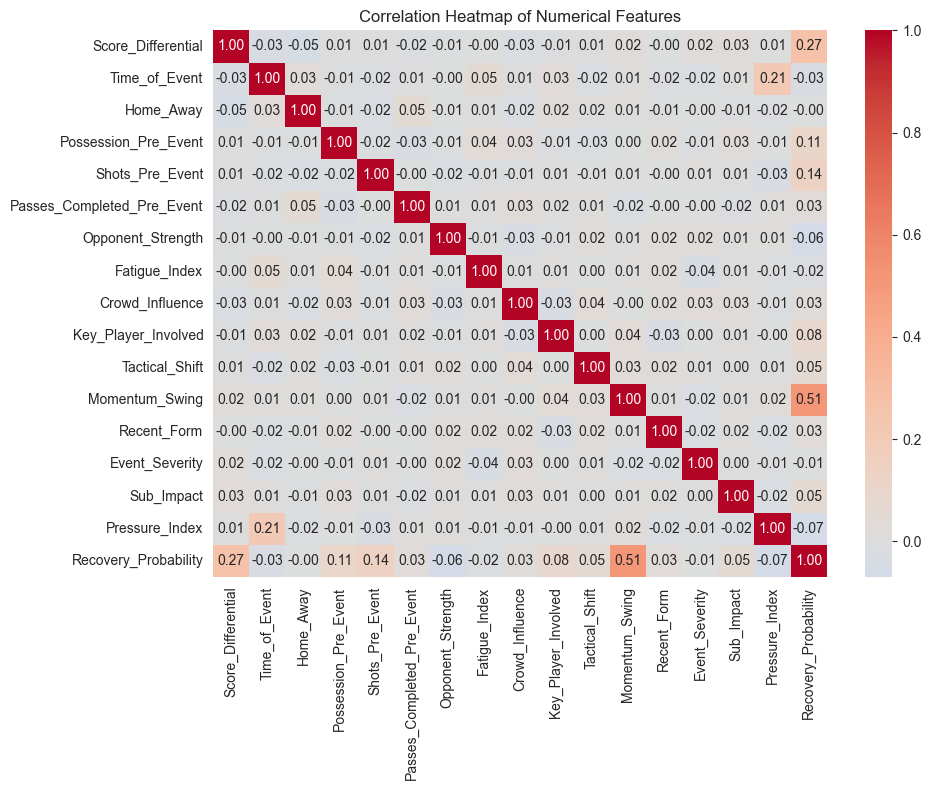

In [23]:
# 4. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
#plt.savefig("outputs/correlation_heatmap.png")
plt.show()

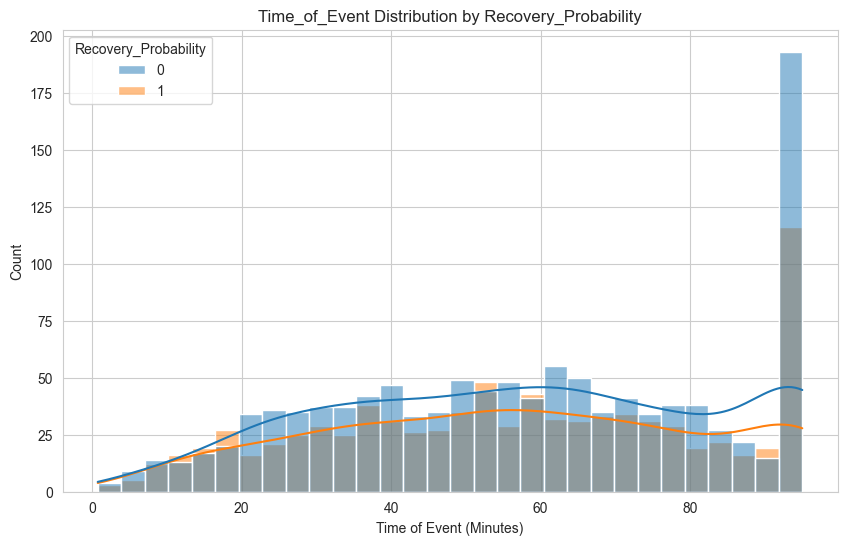

In [25]:
# 5. Time_of_Event Distribution by Recovery_Probability
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time_of_Event', hue='Recovery_Probability', bins=30, kde=True)
plt.title("Time_of_Event Distribution by Recovery_Probability")
plt.xlabel("Time of Event (Minutes)")
plt.ylabel("Count")
#plt.savefig("outputs/time_of_event_distribution.png")
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Engineering
# 1. Encode Event_Type (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Event_Type'], prefix='Event')

In [27]:
# 2. Bin Time_of_Event into Game Stages
df_encoded['Game_Stage'] = pd.cut(
    df_encoded['Time_of_Event'],
    bins=[0, 15, 30, 45, 60, 75, 90, 100],
    labels=['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90+'],
    include_lowest=True
)
df_encoded = pd.get_dummies(df_encoded, columns=['Game_Stage'], prefix='Stage')

In [28]:
# 3. Create Momentum Bins
df_encoded['Momentum_Bin'] = pd.cut(
    df_encoded['Momentum_Swing'],
    bins=[-float('inf'), -10, 0, 10, float('inf')],
    labels=['Strong_Negative', 'Negative', 'Positive', 'Strong_Positive'],
    include_lowest=True
)
df_encoded = pd.get_dummies(df_encoded, columns=['Momentum_Bin'], prefix='Momentum')

In [29]:
# 4. Interaction Features
df_encoded['Possession_x_Shots'] = df_encoded['Possession_Pre_Event'] * df_encoded['Shots_Pre_Event']
df_encoded['Pressure_x_Fatigue'] = df_encoded['Pressure_Index'] * df_encoded['Fatigue_Index']

In [30]:
# 5. Drop unnecessary columns
df_encoded = df_encoded.drop(['Time_of_Event'], axis=1)  # Redundant after Game_Stage

In [31]:
# Separate features and target
X = df_encoded.drop('Recovery_Probability', axis=1)
y = df_encoded['Recovery_Probability']

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Scale numerical features
numerical_cols = ['Score_Differential', 'Possession_Pre_Event', 'Shots_Pre_Event',
                  'Passes_Completed_Pre_Event', 'Opponent_Strength', 'Fatigue_Index',
                  'Crowd_Influence', 'Momentum_Swing', 'Recent_Form', 'Event_Severity',
                  'Sub_Impact', 'Pressure_Index', 'Possession_x_Shots', 'Pressure_x_Fatigue']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [35]:
# Save scaler for Streamlit app
import joblib
joblib.dump(scaler, "scaler.pkl")

print("=== Feature Engineering Complete ===")
print(f"Features: {X_train.columns.tolist()}")
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

=== Feature Engineering Complete ===
Features: ['Score_Differential', 'Home_Away', 'Possession_Pre_Event', 'Shots_Pre_Event', 'Passes_Completed_Pre_Event', 'Opponent_Strength', 'Fatigue_Index', 'Crowd_Influence', 'Key_Player_Involved', 'Tactical_Shift', 'Momentum_Swing', 'Recent_Form', 'Event_Severity', 'Sub_Impact', 'Pressure_Index', 'Event_Crucial_Save', 'Event_Goal_Conceded', 'Event_Goal_Scored', 'Event_Missed_Chance', 'Event_Red_Card_Opp', 'Event_Red_Card_Own', 'Event_Sub_In', 'Event_Sub_Out', 'Event_Yellow_Card_Opp', 'Event_Yellow_Card_Own', 'Stage_0-15', 'Stage_15-30', 'Stage_30-45', 'Stage_45-60', 'Stage_60-75', 'Stage_75-90', 'Stage_90+', 'Momentum_Strong_Negative', 'Momentum_Negative', 'Momentum_Positive', 'Momentum_Strong_Positive', 'Possession_x_Shots', 'Pressure_x_Fatigue']
Train Shape: (1600, 38), Test Shape: (400, 38)


## Model Building

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [37]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

In [38]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results[name] = {
        'Accuracy': model.score(X_test, y_test),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [39]:
# Print results
print("=== Model Comparison ===")
for name, res in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {res['Accuracy']:.3f}")
    print(f"ROC AUC: {res['ROC AUC']:.3f}")
    print("Classification Report:")
    print(res['Report'])
    print("Confusion Matrix:")
    print(res['Confusion Matrix'])

=== Model Comparison ===

Logistic Regression:
Accuracy: 0.828
ROC AUC: 0.905
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       229
           1       0.81      0.78      0.79       171

    accuracy                           0.83       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix:
[[198  31]
 [ 38 133]]

Random Forest:
Accuracy: 0.805
ROC AUC: 0.876
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       229
           1       0.79      0.74      0.76       171

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.81      0.80       400

Confusion Matrix:
[[196  33]
 [ 45 126]]

XGBoost:
Accuracy: 0.782
ROC AUC: 0.875
Classification Report:
              precision    re

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2 penalties
}

lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [45]:
# Best model
best_model = grid_search.best_estimator_
print("\n=== Best Logistic Regression Model ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC (CV): {grid_search.best_score_:.3f}")


=== Best Logistic Regression Model ===
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC (CV): 0.899


In [46]:
# Evaluate on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
print("\n=== Logistic Regression Test Performance ===")
print(f"Accuracy: {best_model.score(X_test, y_test):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Logistic Regression Test Performance ===
Accuracy: 0.828
ROC AUC: 0.906
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       229
           1       0.82      0.77      0.79       171

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix:
[[200  29]
 [ 40 131]]


C:\Users\Chandu\AppData\Local\Temp\ipykernel_20828\3930398728.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')


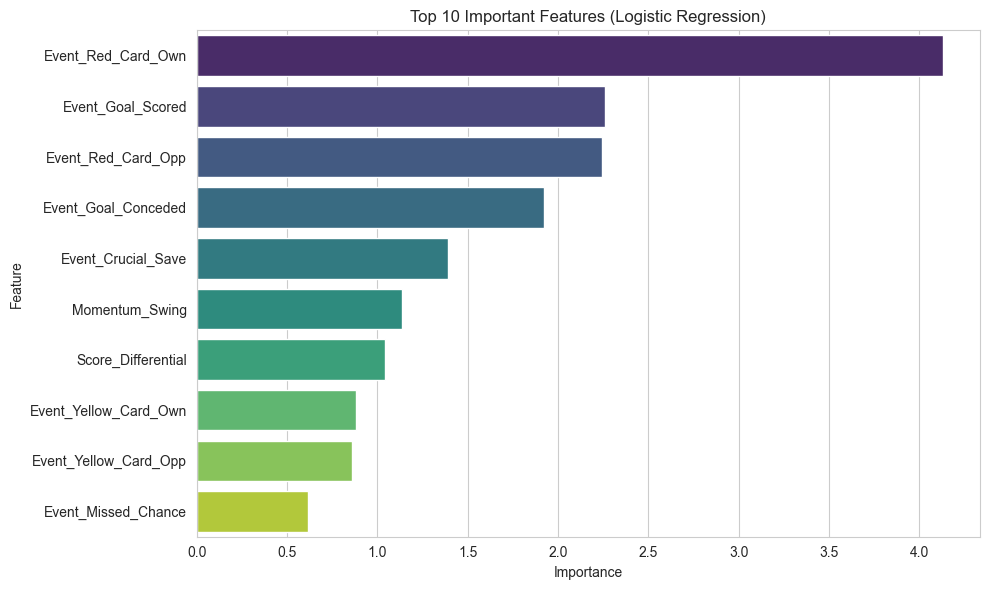

In [47]:
# Extract feature importance (coefficients)
coefficients = best_model.coef_[0]  # Shape: (n_features,)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)  # Take absolute value for magnitude
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (Logistic Regression)")
plt.tight_layout()
#plt.savefig("outputs/logistic_feature_importance.png")
plt.show()

In [48]:
import joblib

# Save the model
joblib.dump(best_model, "logistic_model.pkl")


['logistic_model.pkl']

In [50]:
# Save feature names for Streamlit
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']